<a href="https://colab.research.google.com/github/luongdiem2005/movie-ratings-analysis/blob/main/p6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).

Top 10 movies with the most ratings: 
movieId  title                                    
356      Forrest Gump (1994)                          329
318      Shawshank Redemption, The (1994)             317
296      Pulp Fiction (1994)                          307
593      Silence of the Lambs, The (1991)             279
2571     Matrix, The (1999)                           278
260      Star Wars: Episode IV - A New Hope (1977)    251
480      Jurassic Park (1993)                         238
110      Braveheart (1995)                            237
589      Terminator 2: Judgment Day (1991)            224
527      Schindler's List (1993)                      220
Name: rating, dtype: int64


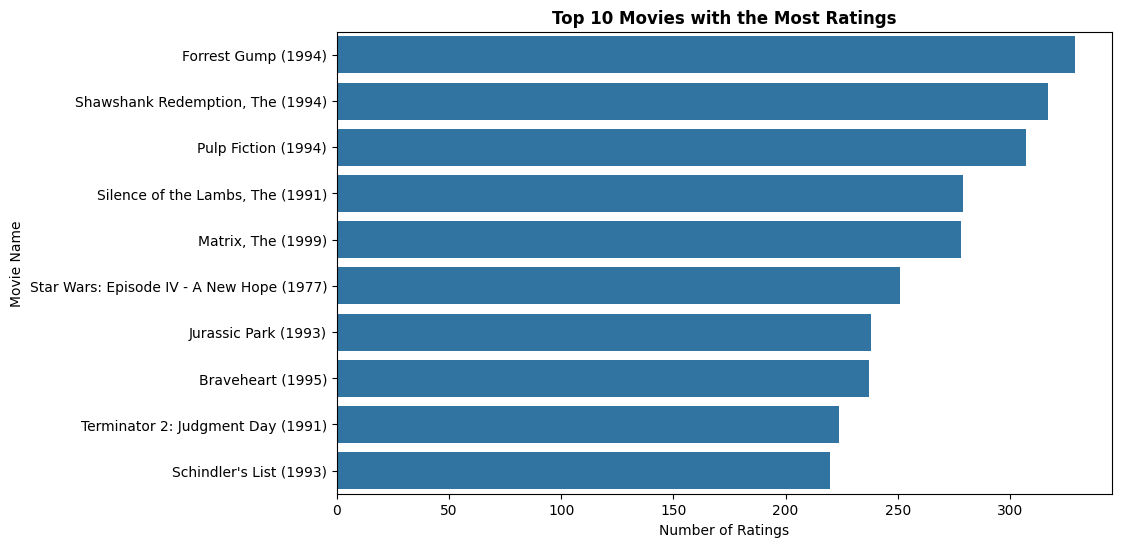


Top 10 movies with highest average ratings: 
                                                                mean  count
movieId title                                                              
318     Shawshank Redemption, The (1994)                    4.429022    317
2959    Fight Club (1999)                                   4.272936    218
50      Usual Suspects, The (1995)                          4.237745    204
260     Star Wars: Episode IV - A New Hope (1977)           4.231076    251
527     Schindler's List (1993)                             4.225000    220
1196    Star Wars: Episode V - The Empire Strikes Back ...  4.215640    211
1198    Raiders of the Lost Ark (Indiana Jones and the ...  4.207500    200
296     Pulp Fiction (1994)                                 4.197068    307
2571    Matrix, The (1999)                                  4.192446    278
356     Forrest Gump (1994)                                 4.164134    329


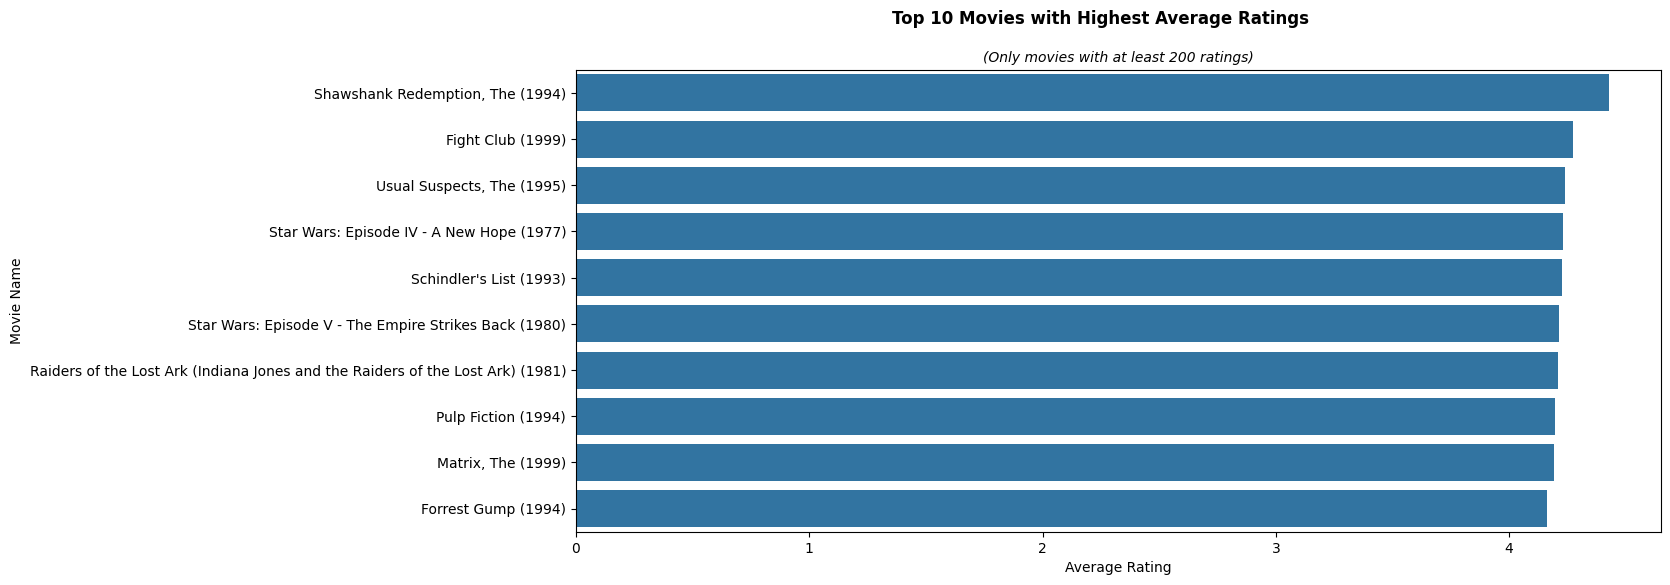

In [12]:
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
base = "/content/drive/MyDrive/projects/movie-ratings-analysis"
movies = pd.read_csv(f"{base}/data/clean_movies.csv")
ratings = pd.read_csv(f"{base}/data/clean_ratings.csv")

df = ratings.merge(movies, on="movieId")

# Top movies with the most ratings
top_count = df.groupby(['movieId', 'title'])['rating'].count().sort_values(ascending=False).head(10)
print("\nTop 10 movies with the most ratings: ")
print(top_count)
plt.figure(figsize=(10,6))
sns.barplot(x=top_count.values, y=top_count.index.get_level_values('title'))
plt.title("Top 10 Movies with the Most Ratings", fontweight="bold")
plt.xlabel("Number of Ratings")
plt.ylabel("Movie Name")
plt.show()

# Top movies with highest average ratings
movie_stats = df.groupby(['movieId', 'title'])['rating'].agg(['mean', 'count'])
top_mean = movie_stats[movie_stats['count'] >= 200].sort_values('mean', ascending=False).head(10)
print("\nTop 10 movies with highest average ratings: ")
print(top_mean)
plt.figure(figsize=(14,6))
sns.barplot(x=top_mean['mean'], y=top_mean.index.get_level_values('title'))
plt.title("(Only movies with at least 200 ratings)", fontsize=10, fontstyle="italic")
plt.suptitle("Top 10 Movies with Highest Average Ratings", fontweight="bold")
plt.xlabel("Average Rating")
plt.ylabel("Movie Name")
plt.show()


